<a href="https://colab.research.google.com/github/guillaumebrethes/Oct_cda_bankmarketing/blob/main/Sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 1 : Explorations des données / Data Exploration
*   Ceci est la premeire étape d'exploartion des données et de la premiere DataViz

In [206]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).



# **1.**   Importation des modules / Importing modules


In [207]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Guillaume/bank.csv")

# **2.**  Observation de nos données / Data Observation



## **2 - 1** : Etudes préliminaires / Preliminary Steps


In [208]:
df = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Guillaume/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [209]:
df.shape

(11162, 17)

* Notre jeux de données est composées de 11 162 lignes et 17 colonnes, représentées ci-dessous
* Our dataset consists of 11,162 rows and 17 columns, each representing a specific attribute. Here is an overview of the columns present in the dataset

| Colonne    | Description                                                              | Qualitative / Quantitative |
|------------|--------------------------------------------------------------------------|----------------------------|
| age        | Âge du client                                                            |Quantitative - catégorielles|
| job        | Type d'emploi du client                                                  |Qualitative - continues     |
| marital    | Statut marital du client                                                 |Qualitative - continues     |
| education  | Niveau d'éducation du client                                             |Qualitative - continues     |
| default    | Le client à t'il un défaut sur un crédit                                       |Qualitative - continues     |
| balance    | Solde moyen annuel sur le compte                                                      |Quantitative - catégorielles|
| housing    | Le client à t'il un prêt immobilier                                        |Qualitative - continues     |
| loan       | Le client à un prêt personnel en cour personnel                                         |Qualitative - continues     |
| contact    | Type de communication pour contacter le client                           |Qualitative - continues     |
| day        | Jour du mois pour le dernier contact                                     |Qualitative - continues     |
| month      | Mois de la dernière communication                                        |Qualitative - continues     |
| duration   | Durée de la dernière communication en secondes                           |Quantitative - catégorielles|
| campaign   | Nombre de contacts effectués lors de cette campagne                      |Quantitative - catégorielles|
| pdays      | Nombre de jours écoulés depuis le dernier contact de la dernière campagne|Quantitative - catégorielles|
| previous   | Nombre de contacts effectués avant cette campagne                        |Quantitative - catégorielles|
| poutcome   | Résultat de la dernière campagne de marketing précédente                 |Qualitative - continues     |
| deposit    | Le client à t'il souscrit à un dépôt à terme                               |Qualitative - continues     |


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


* Observation des valeurs manquantes
* Observing missing values

In [211]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* Il semberait que nous n'ayons pas de valeurs manquantes.
Regardons maintenant les modalités par colonnes. Les modalitées sont affichées en % et arrondi à 2 chiffres après la virgule
* Display of modalities by column in %

In [ ]:
for col in df.columns:
  unique_value = df[col].unique()
  print(f"> : {col} ==> : {unique_value}")

  value_counts = df[col].value_counts(normalize= True).round(2) * 100
  value_counts_with_percent = value_counts.map("{:.2f} %".format)

  print(value_counts_with_percent)
  print(f'- {df[col].dtypes} -')
  print('---------------------------')

* Nous avons dans notre jeux de données par colonnes :
 * **job** : 1% de unknown
 * **education** : 4% de unknown
 * **pdays** : 75% des valeurs qui sont : -1
 * **previous** : 75% des valeurs qui sont : -0

In [213]:
# analyse des 75% dans "pdays" et "previous"
pdays_nul = df[df['pdays'] == -1]
previous_nul = df[df['previous'] == 0]

print('pdays_nul    :', pdays_nul.shape)
print("previous_nul :", previous_nul.shape)

pdays_nul_equal_previous_nul = pdays_nul.equals(previous_nul)
print("pdays_nul_equal_previous_nul :", pdays_nul_equal_previous_nul)

pdays_nul    : (8324, 17)
previous_nul : (8324, 17)
pdays_nul_equal_previous_nul : True


* les lignes dans **pdays = -1** et **previous = 0** sont identique
75% des clients de la campagne actuelle, n'ont pas participé à la campgne précédente, donc n'ont pas pu etre contacté.

### 2 - 1 - 1 Mini étude: **nouveaux clients** vs **ancien clients**

In [214]:
# Nous séparons les customers en 2 catégories
# df avec les nouveaux clients
new_customers_df = pdays_nul

# df avec les anciens clients
sup_to_sup = df[df['pdays'] == -1].index
old_customers_df = df.drop(sup_to_sup)
old_customers_df = old_customers_df.reset_index(drop=True)

old_customers_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
1,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
2,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
3,34,admin.,married,tertiary,no,899,yes,no,unknown,12,nov,114,1,170,3,failure,yes
4,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,1091,2,150,1,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,40,blue-collar,divorced,primary,no,54,yes,no,cellular,13,may,10,5,362,3,other,no
2834,37,management,married,tertiary,no,1594,yes,no,cellular,17,apr,110,1,260,5,failure,no
2835,60,retired,divorced,tertiary,no,-134,no,no,cellular,12,may,243,1,271,4,failure,no
2836,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no


In [215]:
new_customers_df['deposit'].value_counts(normalize= True).round(2) * 100

no     59.0
yes    41.0
Name: deposit, dtype: float64

In [216]:
old_customers_df['deposit'].value_counts(normalize= True).round(2) * 100

yes    67.0
no     33.0
Name: deposit, dtype: float64

* 41% des nouveaux client ont souscrit
* 67% des anciens client ont souscrit

### 2 - 1 - 2 Mini étude: varible **job** pour les **nouveaux** client et les **anciens**



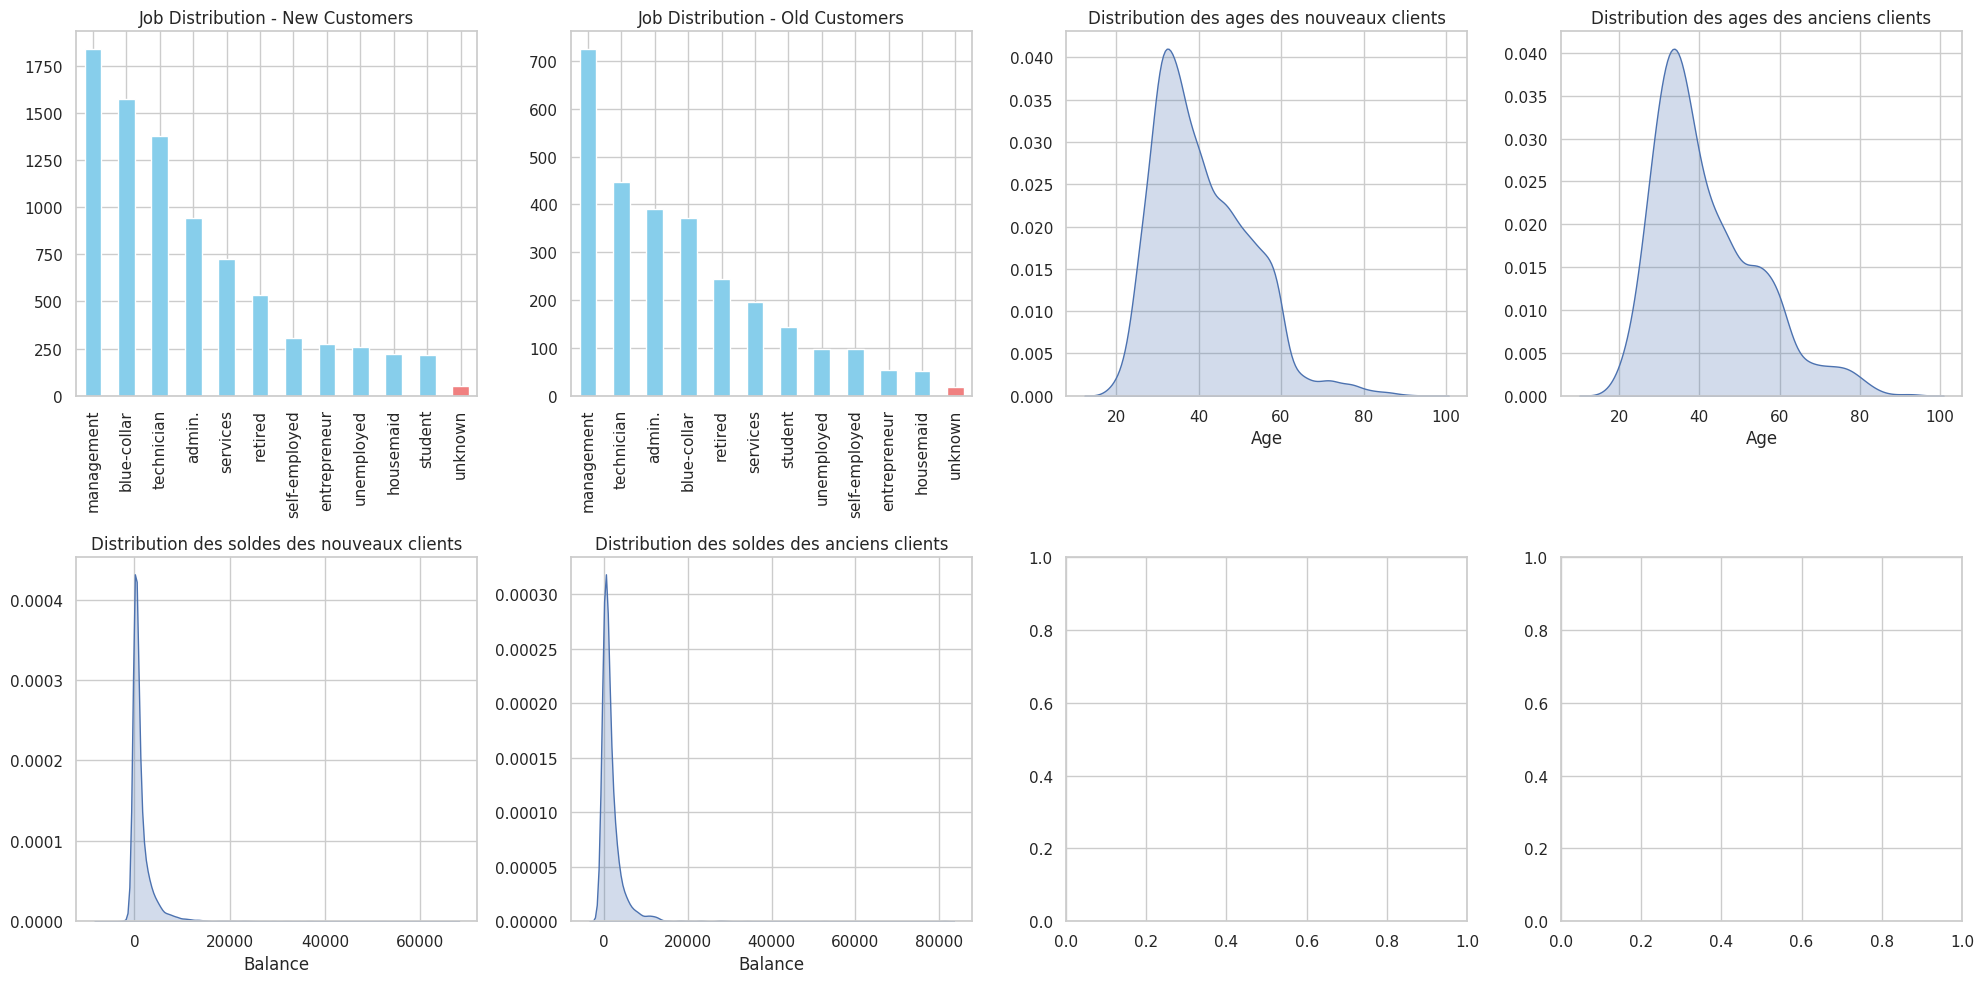

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Deux lignes, quatre colonnes

# 1 ### New Customer "Job"
axs[0, 0].set_title('Job Distribution - New Customers')
new_customers_df['job'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[0, 0]
)
axs[0, 0].set_ylabel('')
axs[0, 0].set_xlabel('')

# 2 ### Old Customer "Job"
axs[0, 1].set_title('Job Distribution - Old Customers')
old_customers_df['job'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[0, 1]
)
axs[0, 1].set_ylabel('')
axs[0, 1].set_xlabel('')

# 3 ### Distribution age new customers
sns.kdeplot(data=new_customers_df, x='age', fill=True, ax=axs[0, 2])
axs[0, 2].set_xlabel('Age')
axs[0, 2].set_ylabel('')
axs[0, 2].set_title('Distribution des ages des nouveaux clients')

# 4 ### Distribution age old customers
sns.kdeplot(data=old_customers_df, x='age', fill=True, ax=axs[0, 3])
axs[0, 3].set_xlabel('Age')
axs[0, 3].set_ylabel('')
axs[0, 3].set_title('Distribution des ages des anciens clients')

# 5 ### Distribution balance new customers
sns.kdeplot(data=new_customers_df, x='balance', fill=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Balance')
axs[1, 0].set_ylabel('')
axs[1, 0].set_title('Distribution des soldes des nouveaux clients')

# 6 ### Distribution balance old customers
sns.kdeplot(data=old_customers_df, x='balance', fill=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Balance')
axs[1, 1].set_ylabel('')
axs[1, 1].set_title('Distribution des soldes des anciens clients')

plt.tight_layout()
plt.show()


In [218]:
# Médiane de l'âge
print('Médiane de l\'âge des anciens clients :', old_customers_df['age'].median())
print('Médiane de l\'âge des nouveaux clients :', new_customers_df['age'].median())

# Médiane du solde
print('Médiane du solde des anciens clients :', old_customers_df['balance'].median())
print('Médiane du solde des nouveaux clients :', new_customers_df['balance'].median())

# Quartiles du solde
print('Quartiles du solde des anciens clients :')
print(old_customers_df['balance'].quantile([0.25, 0.5, 0.75]))

print('Quartiles du solde des nouveaux clients :')
print(new_customers_df['balance'].quantile([0.25, 0.5, 0.75]))


Médiane de l'âge des anciens clients : 38.0
Médiane de l'âge des nouveaux clients : 39.0
Médiane du solde des anciens clients : 722.0
Médiane du solde des nouveaux clients : 497.0
Quartiles du solde des anciens clients :
0.25     219.00
0.50     722.00
0.75    2060.75
Name: balance, dtype: float64
Quartiles du solde des nouveaux clients :
0.25      94.75
0.50     497.00
0.75    1588.00
Name: balance, dtype: float64


* Il semble que pour les anciens clients et les nouveux clients:
 * la représentation de la varibles job et la distribution des ages semble etre similaire
 * il n'y a pas de grande différence sur la variable balance, grace aux études des médianes et quartiles

**Il n'est pas judicieux de faire une étude séparé pour les anciens client et les nouveux**

# **3.**  Traitements des données

## **3 - 1** Gestions des valeurs non désirées (unknown)


* Nous avons donc dans notre jeux de données plusieurs colonnes avec des valeurs non désirées = VND


In [219]:
# Création du DataFrame_unknown
unknown = {'Name': ['job', 'education', 'contact', 'poutcome', 'poutcome'],
        'VND': ['unknown', 'unknown', 'unknown', 'unknown', 'other'],
        '%': [1, 4, 21, 75, 5]}

unknown = pd.DataFrame(unknown)

display(unknown)

,Name,VND,%
0,job,unknown,1
1,education,unknown,4
2,contact,unknown,21
3,poutcome,unknown,75
4,poutcome,other,5


* représentation graphique de nos valeurs **unknown**

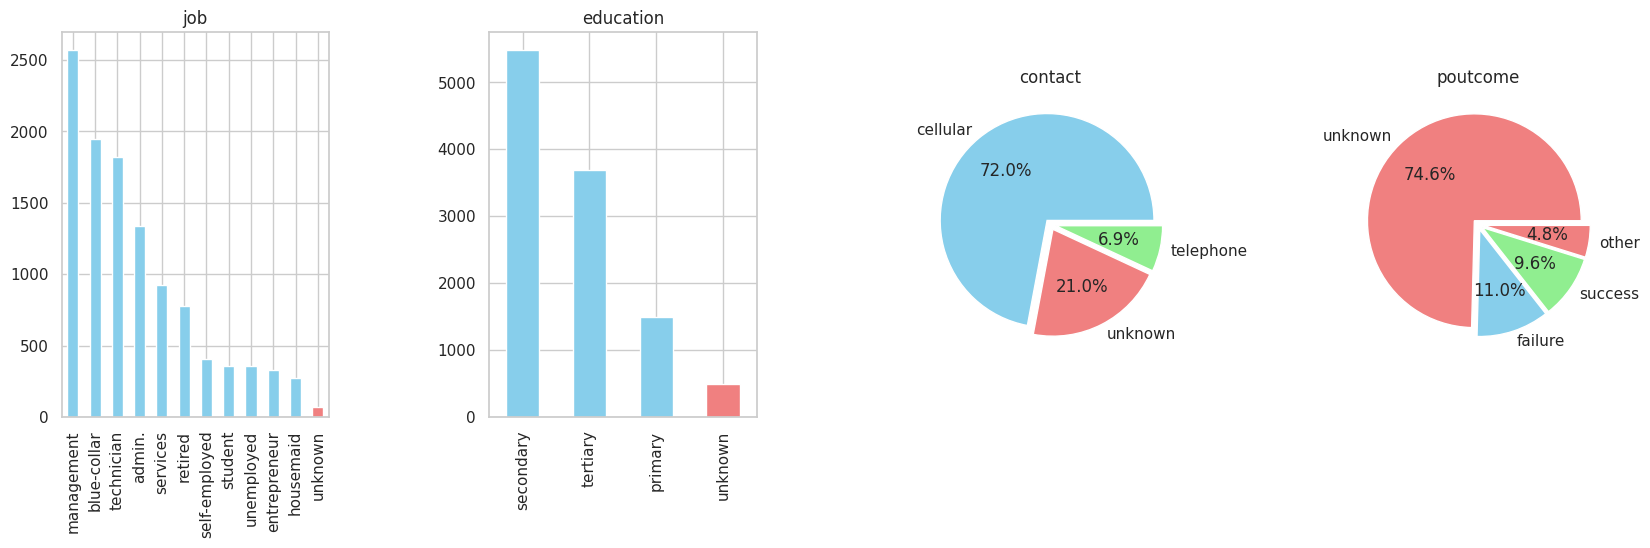

In [220]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Une ligne, quatre colonnes

#1 ### Job
axs[0].set_title('job')
df['job'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[0]
)
axs[0].set_ylabel('')
axs[0].set_xlabel('')

#2 ### Education
axs[1].set_title('education')
df['education'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[1]
)
axs[1].set_ylabel('')
axs[1].set_xlabel('')

#3 ### Contact
axs[2].set_title('contact')
df['contact'].value_counts().plot(
    kind='pie',
    colors=['skyblue', 'lightcoral', 'lightgreen'],
    autopct='%1.1f%%',
    explode=(0.05, 0.05, 0.05),
    ax=axs[2]
)
axs[2].set_ylabel('')
axs[2].set_xlabel('')

#4 ### Poutcome
axs[3].set_title('poutcome')
df['poutcome'].value_counts().plot(
    kind='pie',
    colors=['lightcoral', 'skyblue', 'lightgreen', 'lightcoral'],
    autopct='%1.1f%%',
    explode=(0.05, 0.05, 0.05, 0.05),
    ax=axs[3]
)
axs[3].set_ylabel('')
axs[3].set_xlabel('')

fig.subplots_adjust(wspace=0.6, hspace=0.8)
plt.show()


* Les graphiques précédents, représentent visuellement les valeurs **unknown** dans nos variables
* Pour les colonnes '**job**', et '**education**' nous allons supprimer ces
lignes car le % est très faible.
* La colonne '**contact**' ne nous interesse pas dans notre cas metier, nous allons donc la supprimer.
* Pour la colonne '**poutcome**', il semble ideal de créer une categorie pour regrouper les valeurs '**unknown**' et '**other**', qui représentent à eux deux 80%  

* Suppression des valeurs non désirées, et de la colonne contact


In [221]:
# suppression de la colonne contact du dataframe

df = df.drop('contact', axis=1)

* Dans la suite df_drop équivaut au dataset, nettoyé ou en cour de traitement de nettoyage

In [222]:
# suppresion des lignes lorsque variables "job" unknown

df_drop = df[df['job'] != 'unknown']
df_drop = df_drop.reset_index(drop=True)
df_drop.shape

(11092, 16)

In [223]:
# suppresion des lignes lorsque variables "education" = unknown

df_drop = df_drop[df_drop['education'] != 'unknown']
df_drop.shape

(10634, 16)

In [224]:
# Calcul du nombre

rows_drop = df.shape[0] - df_drop.shape[0]
print(f"Nous avons supprimé {rows_drop} lignes, soit {round((rows_drop / df.shape[0] * 100), 2) } % des valeurs.")

Nous avons supprimé 528 lignes, soit 4.73 % des valeurs.


* Fusion de **other** et **unknown** de la colonne **poutcome**

In [225]:
df_drop['poutcome'] = df_drop['poutcome'].replace('other', 'unknown')
df_drop['poutcome'].value_counts()

unknown    8453
failure    1176
success    1005
Name: poutcome, dtype: int64

## **3 - 2** Gestions des valeurs extrêmes et/ou obérantes


### 3 - 2 - 1 Avant traitement


### - Représentation des boxplots des colonnes numériques en fonction de la réponse de déposit avant traitement des données

* Représentations avec des boxplots, des variables numériques avant traitement



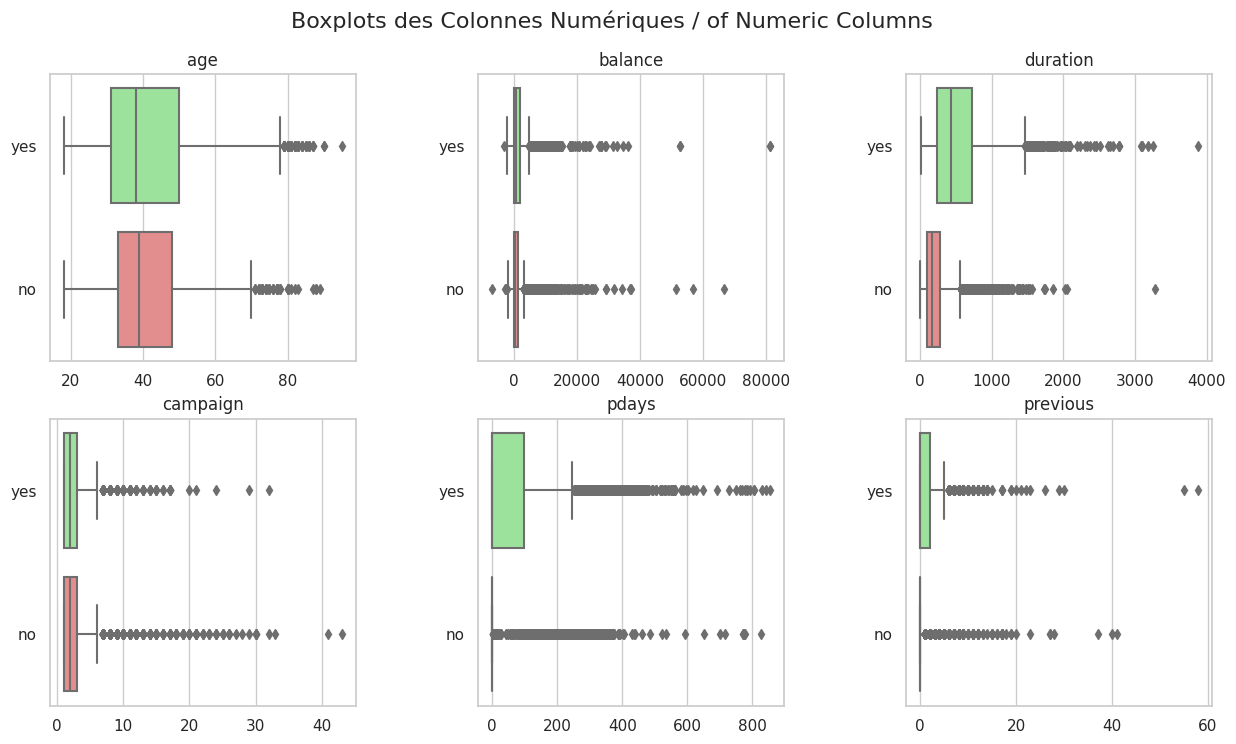

In [226]:
# Set the style
sns.set(style="whitegrid")

# Columns list
columns_num = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
colors = {'yes': 'lightgreen', 'no': 'lightcoral'}

# Create a figure and axis
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Boxplots des Colonnes Numériques / of Numeric Columns', fontsize=16)

# Flatten the axis array for easy indexing
axs = axs.flatten()

# Plot boxplots
for i, column in enumerate(columns_num):
    sns.boxplot(x=df_drop[column],
                y=df_drop['deposit'],
                ax=axs[i],
                palette=colors)
    axs[i].set_title(column)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Adjust layout
fig.subplots_adjust(top=0.9, wspace=0.4)
plt.show()


### - Représentation des boxplots des colonnes numériques avant traitement des données

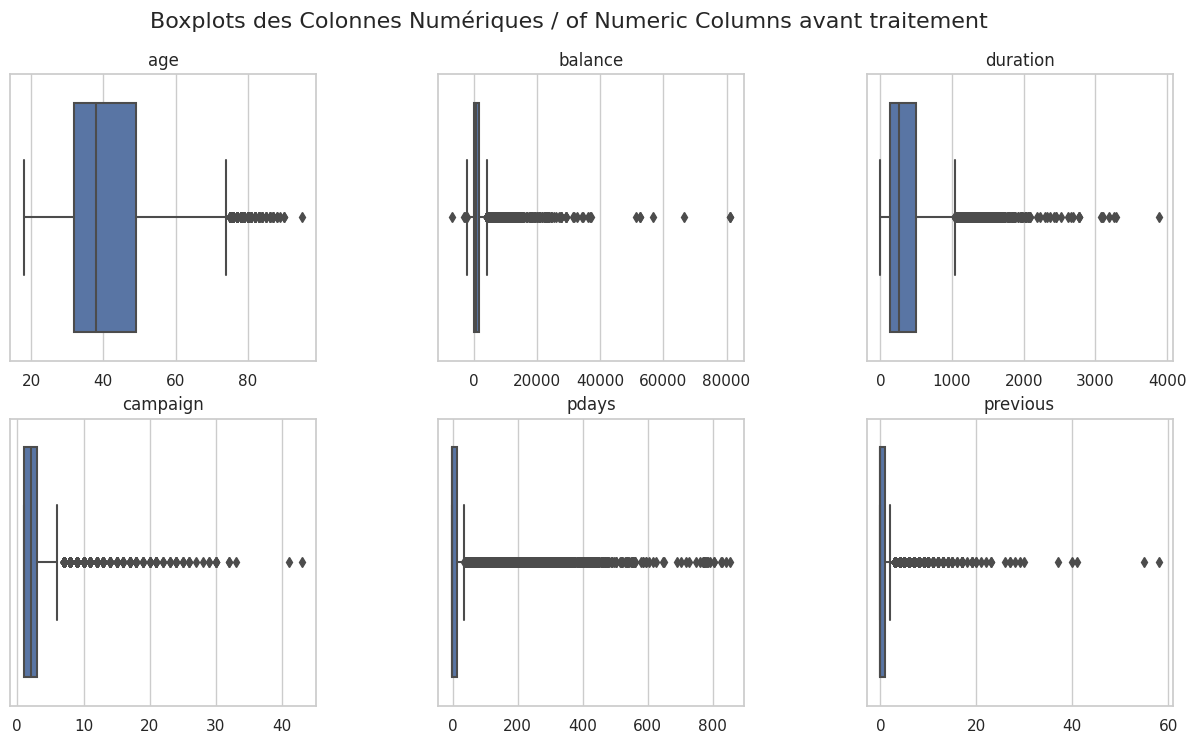

In [227]:
# Set the style
sns.set(style="whitegrid")

# Columns list
columns_num = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
colors = {'yes': 'lightgreen', 'no': 'lightcoral'}

# Create a figure and axis
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Boxplots des Colonnes Numériques / of Numeric Columns avant traitement ', fontsize=16)

# Flatten the axis array for easy indexing
axs = axs.flatten()

# Plot boxplots
for i, column in enumerate(columns_num):
    sns.boxplot(x=df_drop[column],
                ax=axs[i]
                )
    axs[i].set_title(column)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Adjust layout
fig.subplots_adjust(top=0.9, wspace=0.4)
plt.show()


* Calul des quartiles de chaques colonnes numériques

In [228]:
quant = [0.25, 0.5, 0.75]
quant_str = ['0.25', '0.5', '0.75']


quartiles = df_drop[columns_num].quantile(quant)
display(quartiles)

,age,balance,duration,campaign,pdays,previous
0.25,32.0,119.0,138.0,1.0,-1.00,0.0
0.50,38.0,542.0,255.0,2.0,-1.00,0.0
0.75,49.0,1693.0,500.0,3.0,13.75,1.0


* Calcul des quartiles sur chaque colonnes en fonction de la valeur de **deposit**

In [229]:
quant = [0.25, 0.5, 0.75]

quartiles_grouped = df_drop.groupby('deposit')[columns_num].quantile(quant)
display(quartiles_grouped)

age  balance  duration  campaign  pdays  previous
deposit                                                         
no      0.25  33.0     63.0      94.0       1.0   -1.0       0.0
        0.50  39.0    410.0     163.0       2.0   -1.0       0.0
        0.75  48.0   1320.0     282.0       3.0   -1.0       0.0
yes     0.25  31.0    203.0     243.0       1.0   -1.0       0.0
        0.50  38.0    718.0     431.0       2.0   -1.0       0.0
        0.75  50.0   2139.0     731.0       3.0   98.0       2.0

### 3 - 2 - 2 Calcul des seuils IQR (manuel)



In [230]:
# Initialiser des dictionnaires pour stocker les quantiles de chaque colonne
quant_1 = {}
quant_2 = {}
quant_3 = {}

col_num = ['age', 'balance', 'duration', 'campaign']
df_drop_num = df_drop[col_num]

# Boucle pour calculer les quantiles pour chaque colonne
for column in df_drop_num.columns:
    quantiles_column = df_drop_num[column].quantile(quant)
    quant_1[column] = quantiles_column.iloc[0]
    quant_2[column] = quantiles_column.iloc[1]
    quant_3[column] = quantiles_column.iloc[2]


In [231]:
IQR_age = quant_3['age'] - quant_1['age']
IQR_balance = quant_3['balance'] - quant_1['balance']
IQR_duration = quant_3['duration'] - quant_1['duration']
IQR_campaign = quant_3['campaign'] - quant_1['campaign']

IQR_sup_age = quant_3['age'] + (1.5 * IQR_age)
IQR_sup_balance = quant_3['balance'] + (1.5 * IQR_balance)
IQR_sup_duration = quant_3['duration'] + (1.5 * IQR_duration)
IQR_sup_campaign = quant_3['campaign'] + (1.5 * IQR_campaign)

IQR_inf_age = quant_1['age'] - (1.5 * IQR_age)
IQR_inf_balance = quant_1['balance'] - (1.5 * IQR_balance)
IQR_inf_duration = quant_1['duration'] - (1.5 * IQR_duration)
IQR_inf_campaign = quant_1['campaign'] - (1.5 * IQR_campaign)

print('IQR_age', IQR_age )
print('IQR_balance', IQR_balance )
print('IQR_duration', IQR_duration )
print('IQR_campaign', IQR_campaign )

print('IQR_sup_age', IQR_sup_age )
print('IQR_sup_balance', IQR_sup_balance )
print('IQR_sup_duration', IQR_sup_duration )
print('IQR_sup_campaign', IQR_sup_campaign )

print('IQR_inf_age', IQR_inf_age )
print('IQR_inf_balance', IQR_inf_balance )
print('IQR_inf_duration', IQR_inf_duration )
print('IQR_inf_campaign', IQR_inf_campaign )

IQR_age 17.0
IQR_balance 1574.0
IQR_duration 362.0
IQR_campaign 2.0
IQR_sup_age 74.5
IQR_sup_balance 4054.0
IQR_sup_duration 1043.0
IQR_sup_campaign 6.0
IQR_inf_age 6.5
IQR_inf_balance -2242.0
IQR_inf_duration -405.0
IQR_inf_campaign -2.0


### 3 - 2 - 3 Calcul des seuils IQR (avec fonction)


In [232]:
def calculate_iqr(df, columns, quantiles):
    """
    Calcule les valeurs de l'IQR (Interquartile Range) ainsi que les bornes supérieures et inférieures pour chaque colonne spécifiée.

    Parameters:
    - df (DataFrame): Le DataFrame contenant les données numérique.
    - columns (list): La liste des colonnes pour lesquelles calculer les valeurs. col_num = ['a remplir]
    - quantiles (list): La liste des quantiles à calculer. quant = ['a remplir']

    Returns:
    - dict: Un dictionnaire contenant les valeurs de l'IQR, les bornes supérieures et inférieures pour chaque colonne spécifiée.
    - pour y acceder : result_iqr[...]
    """

    quant_1 = {}
    quant_3 = {}

    # Boucle pour calculer les quantiles pour chaque colonne numérique
    for column in columns:
        quantiles_column = df[column].quantile(quantiles)
        quant_1[column] = quantiles_column.iloc[0]
        quant_3[column] = quantiles_column.iloc[2]

    # Calculer les IQR
    iqr_values = {f'IQR_{column}': quant_3[column] - quant_1[column] for column in columns}

    # Calculer les bornes supérieures et inférieures pour chaque colonne
    iqr_sup_values = {f'IQR_sup_{column}': quant_3[column] + (1.5 * iqr_values[f'IQR_{column}']) for column in columns}
    iqr_inf_values = {f'IQR_inf_{column}': quant_1[column] - (1.5 * iqr_values[f'IQR_{column}']) for column in columns}

    return {**iqr_values, **iqr_sup_values, **iqr_inf_values}


col_num = ['age', 'balance', 'duration', 'campaign']
quant = [0.25, 0.5, 0.75]

result_iqr = calculate_iqr(df_drop_num, col_num, quant)

# Afficher les résultats
for key, value in result_iqr.items():
    print(f"{key}: {value}")

IQR_age: 17.0
IQR_balance: 1574.0
IQR_duration: 362.0
IQR_campaign: 2.0
IQR_sup_age: 74.5
IQR_sup_balance: 4054.0
IQR_sup_duration: 1043.0
IQR_sup_campaign: 6.0
IQR_inf_age: 6.5
IQR_inf_balance: -2242.0
IQR_inf_duration: -405.0
IQR_inf_campaign: -2.0


### 3 - 2 - 4 Suppression des outliers

In [233]:
df_drop = df_drop[(df_drop['age'] >= IQR_inf_age) & (df_drop['age'] <= IQR_sup_age)]
df_drop = df_drop[(df_drop['balance'] >= IQR_inf_balance) & (df_drop['balance'] <= IQR_sup_balance)]
df_drop = df_drop[(df_drop['duration'] >= IQR_inf_duration) & (df_drop['duration'] <= IQR_sup_duration)]
df_drop = df_drop[(df_drop['campaign'] >= IQR_inf_campaign) & (df_drop['campaign'] <= IQR_sup_campaign)]

print("Nous avons supprimé", round((100 - (df_drop.shape[0] * 100) / df.shape[0]), 2), "% des lignes de notre dataframe")

Nous avons supprimé 23.88 % des lignes de notre dataframe


### 3 - 2 - 5 Représentation des boxplots après traitement des outliers

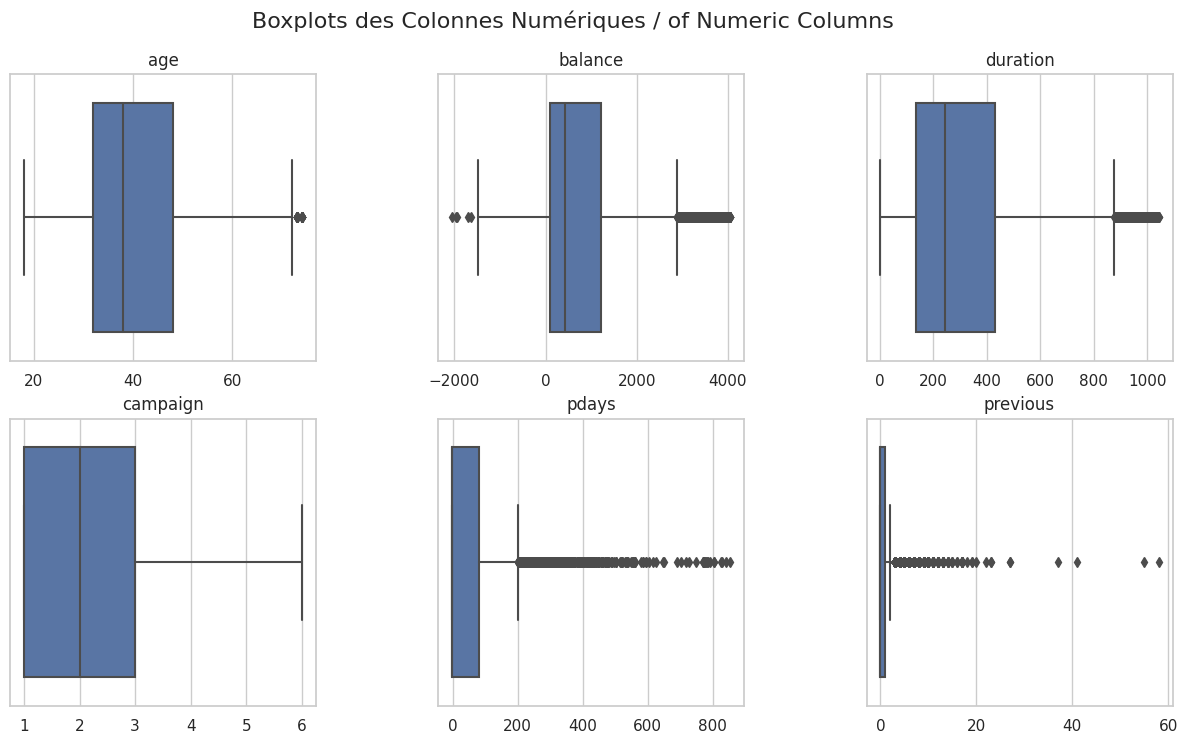

In [234]:
# Set the style
sns.set(style="whitegrid")

# Columns list
columns_num = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
colors = {'yes': 'lightgreen', 'no': 'lightcoral'}

# Create a figure and axis
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Boxplots des Colonnes Numériques / of Numeric Columns', fontsize=16)

# Flatten the axis array for easy indexing
axs = axs.flatten()

# Plot boxplots
for i, column in enumerate(columns_num):
    sns.boxplot(x=df_drop[column],
                ax=axs[i]
                )
    axs[i].set_title(column)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Adjust layout
fig.subplots_adjust(top=0.9, wspace=0.4)
plt.show()


In [235]:
df_drop.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

# **4** : Observation de nos diférentes varibles en fct de la variable cible : **Deposit**


### Variable deposit sur l'ensemble du dataset

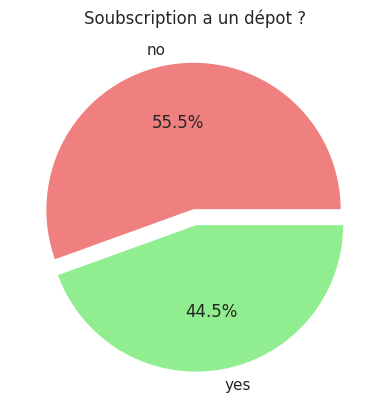

In [236]:
plt.title('Soubscription a un dépot ?')
df_drop['deposit'].value_counts().plot(
        kind= 'pie',
        colors= ['lightcoral', 'lightgreen'],
        autopct='%1.1f%%',
        explode= (0.05, 0.05))
plt.ylabel('')
plt.xlabel('')
plt.show()

### Varibles **éducation, marital, job, poutcome** en fonction de **Deposit**

In [ ]:
#### education
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1
sns.countplot(x= "education", hue="deposit", data=df_drop, ax=axes[0,0])
axes[0,0].set_title('Education')
axes[0,0].set_xlabel('')
axes[0,0].tick_params(axis= 'x', labelsize= 8)

# 2
sns.countplot(x= "marital", hue="deposit", data=df_drop, ax=axes[0,1])
axes[0,1].set_title('Marital')
axes[0,1].set_xlabel('')
axes[0,1].tick_params(axis= 'x', labelsize= 8)

# 3
order_job = df_drop['job'].value_counts().index
sns.countplot(x="job", hue="deposit", data=df_drop, ax=axes[1, 0], order=order_job)
axes[1,0].set_title('Job')
axes[1,0].set_xlabel('')
axes[1,0].tick_params(axis= 'x', labelsize= 8)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90, ha="right")

# 4
sns.countplot(x= "poutcome", hue="deposit", data=df_drop, ax=axes[1,1])
axes[1,1].set_title('poutcome')
axes[1,1].set_xlabel('')
axes[1,1].tick_params(axis= 'x', labelsize= 8)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90, ha="right")

fig.subplots_adjust(wspace= 0.5, hspace= 0.5)
plt.show()

* Es ce qu'il y a des choses intéréssantes à tirer comme observations ?




# **5** : Explorations statistiques
